In [3]:
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file_path = "dataset/glass/glass.data"
names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]
dataset = read_csv(file_path, names=names)

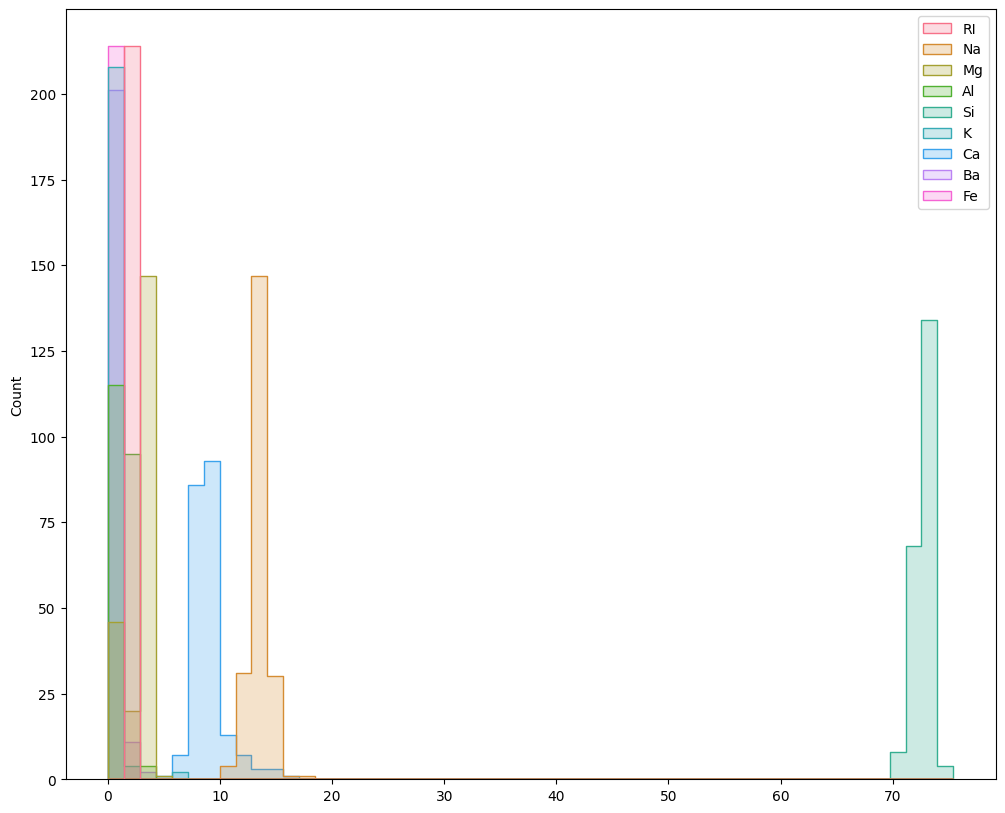

In [5]:
plt.figure(figsize=(12, 10))
sns.histplot(data=dataset.drop(columns=['Id',"class"]),palette=sns.color_palette("husl", 9),element="step")
plt.show()

<Figure size 1200x1000 with 0 Axes>

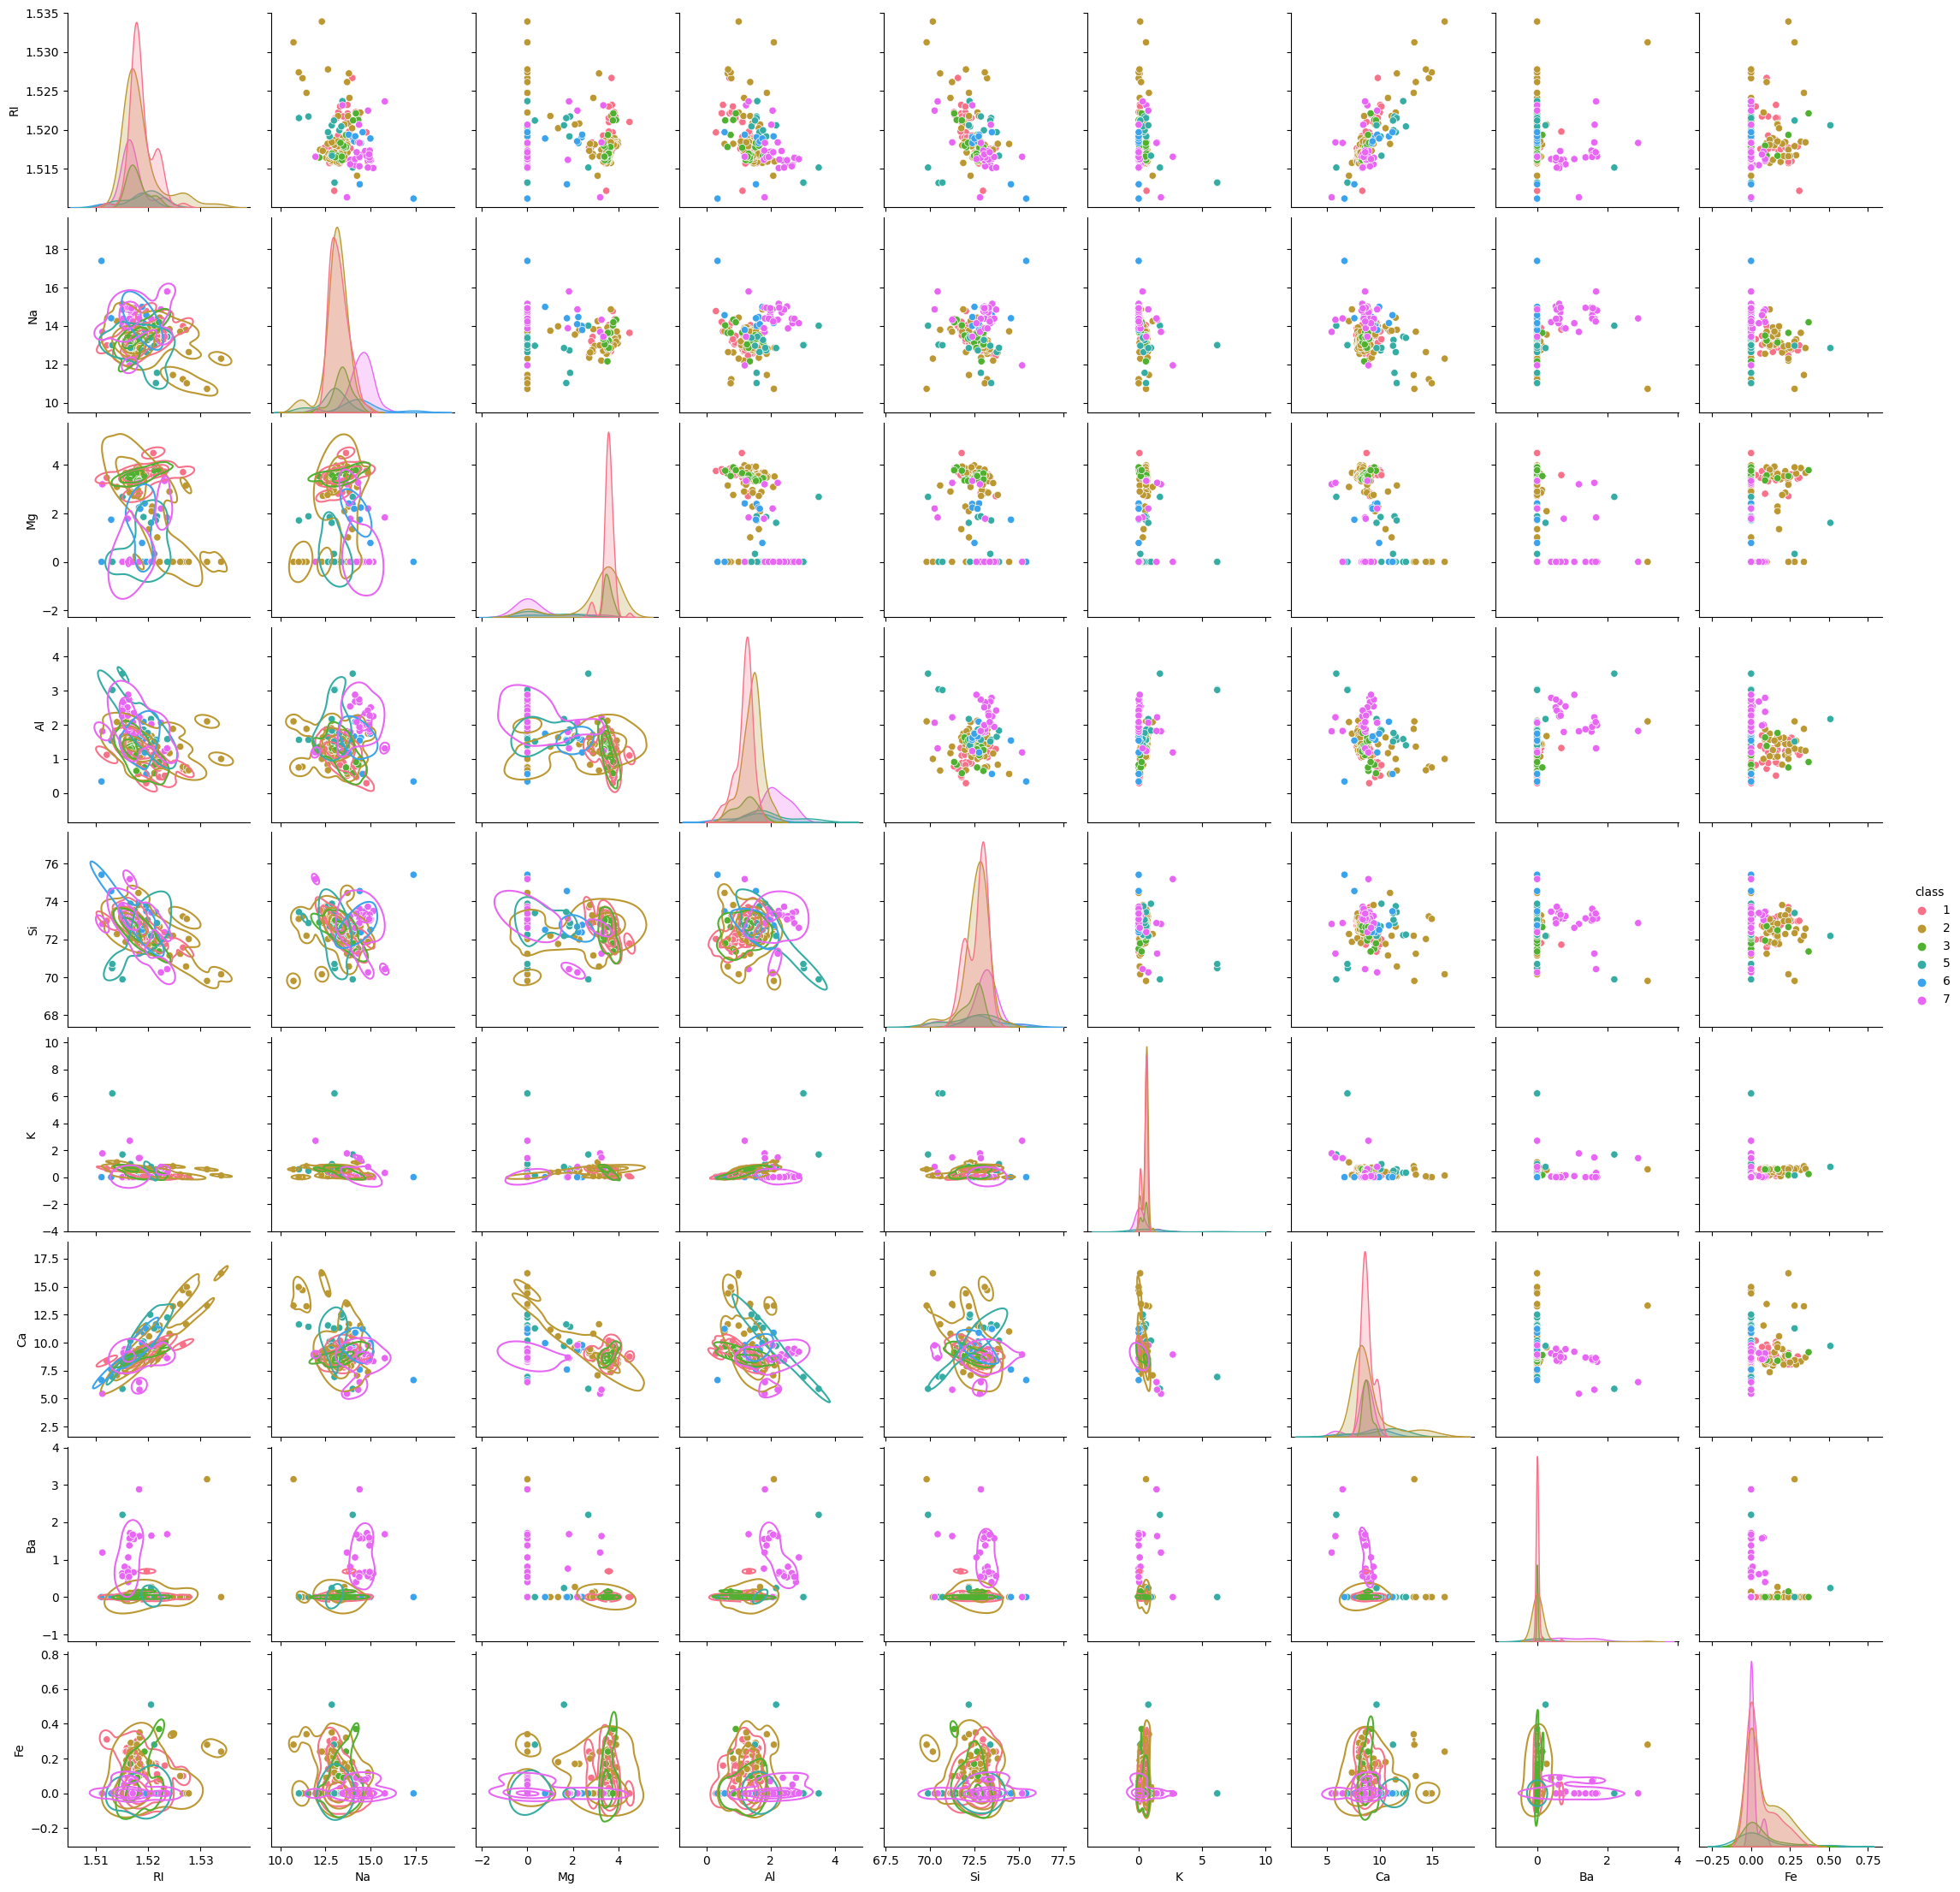

In [6]:
plt.figure(figsize=(12, 10))
g = sns.pairplot(dataset.drop(columns=['Id']),  hue="class", palette=sns.color_palette("husl", 6), diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2",warn_singular=False)
plt.show()

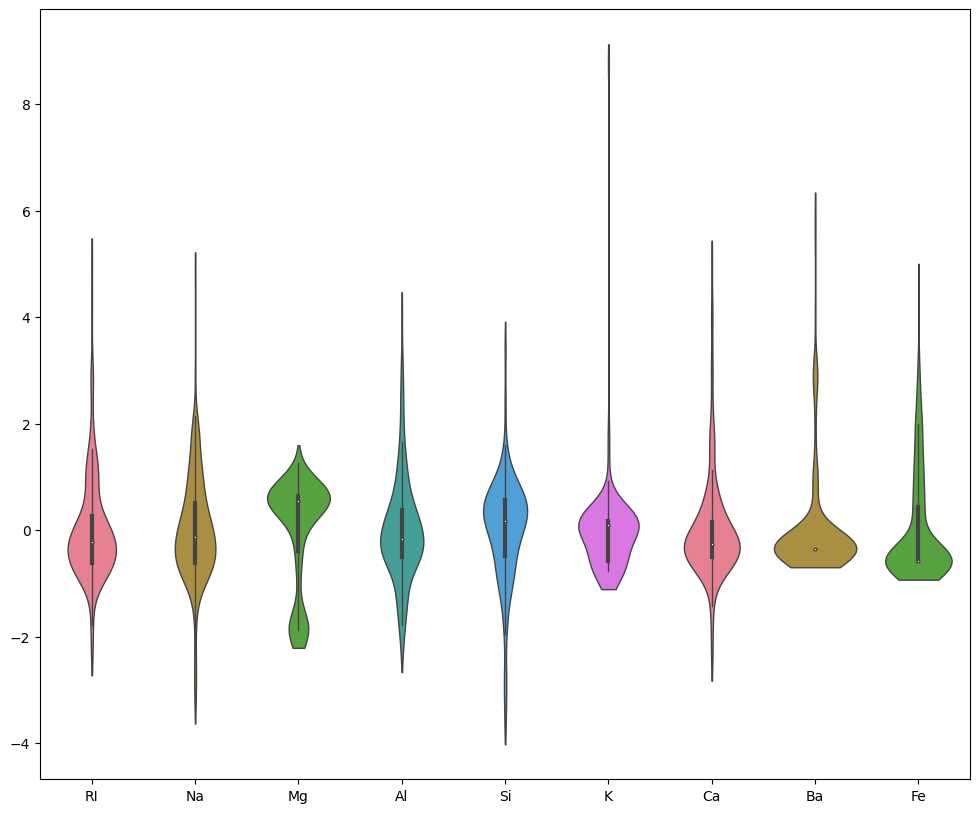

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop(columns=['Id',"class"]))
X_scaled = pd.DataFrame(X_scaled, columns=[ "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"])

plt.figure(figsize=(12, 10))
sns.violinplot(X_scaled,palette=sns.color_palette("husl", 6), cut=1, linewidth=1)
plt.show()

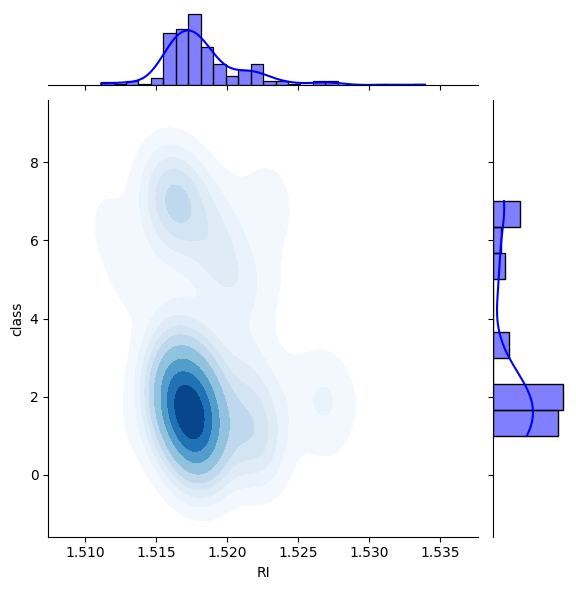

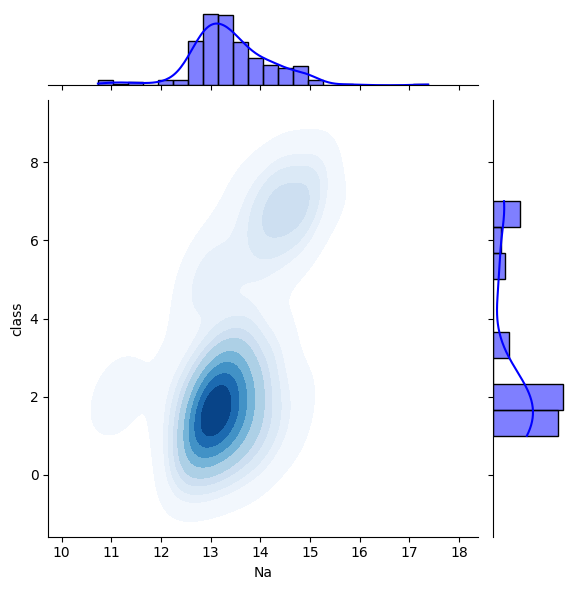

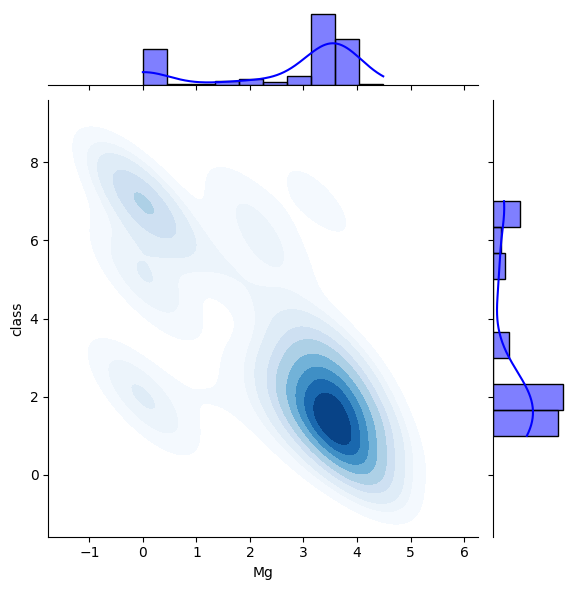

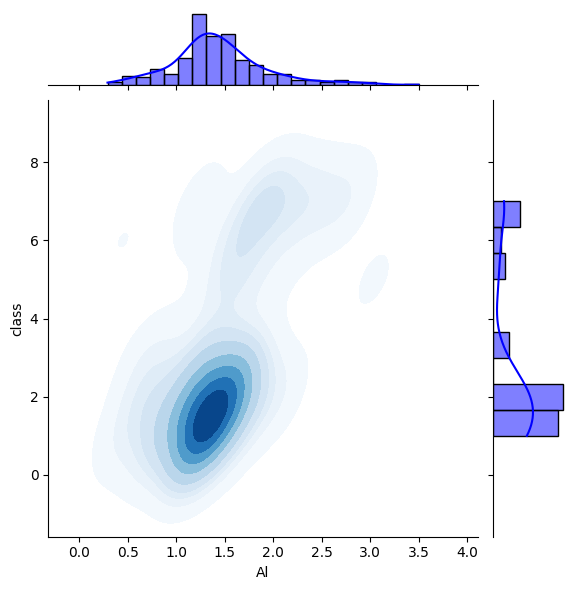

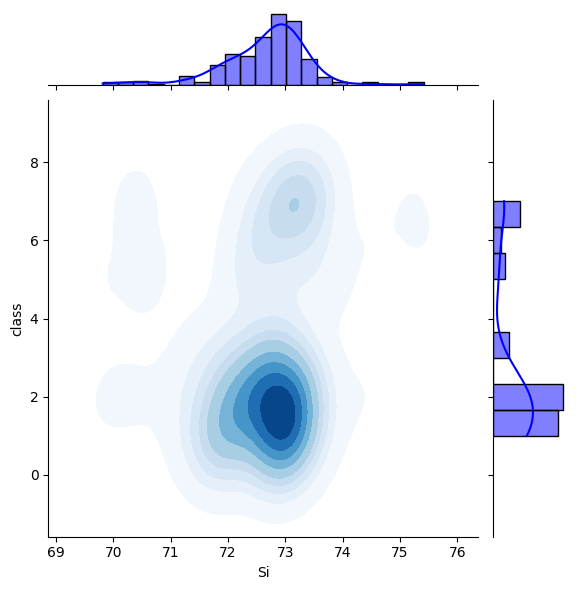

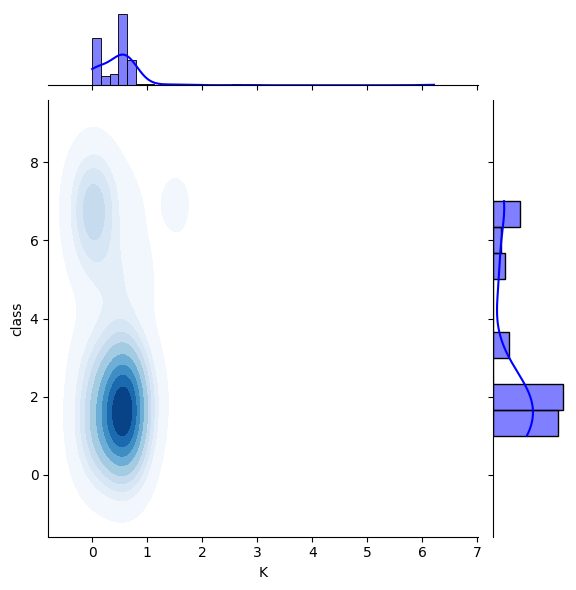

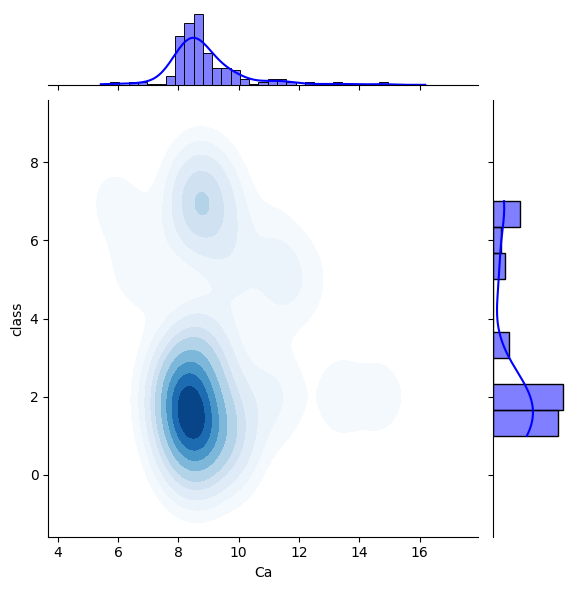

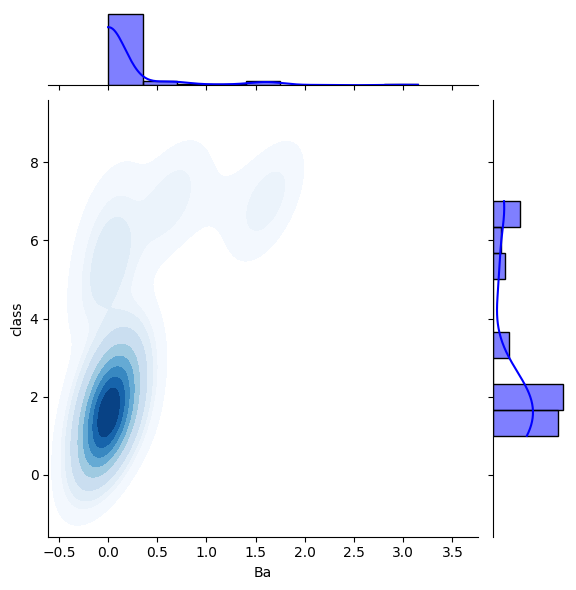

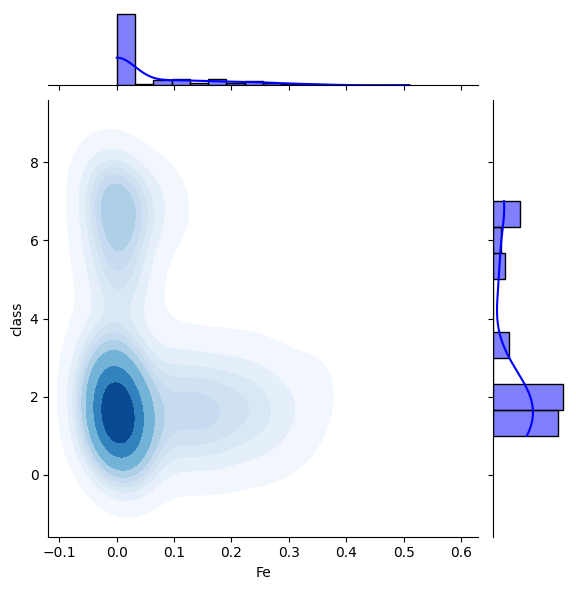

In [22]:
for xs in ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]:
    g = sns.JointGrid(data=dataset, x=xs, y='class')
    g = g.plot_joint(sns.kdeplot, cmap="Blues", fill=True)
    g = g.plot_marginals(sns.histplot, kde=True, color="b")

    plt.show()

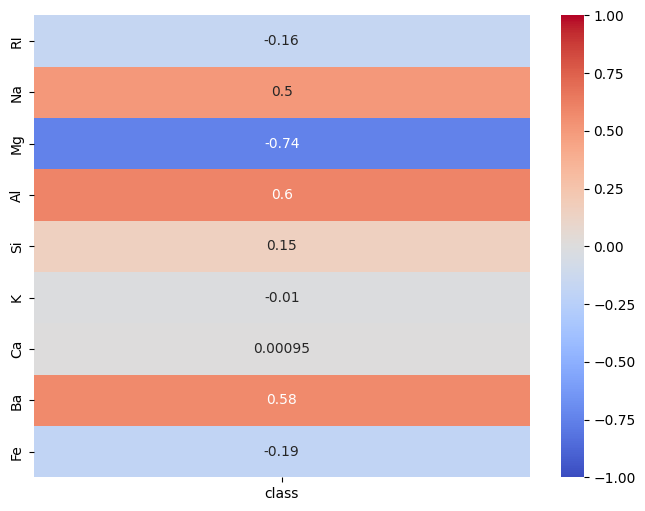

In [19]:
correlation_matrix = dataset.drop(columns=["Id"]).corr()[['class']].drop(['class'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Analysis Details:

1. **Histograms**:
   - The code generates histograms for each feature in the dataset (excluding 'Id' and 'class'), visualized with different colors. This gives insights into the distribution of each feature.

2. **Pair Plots**:
   - Pair plots of all the features (excluding 'Id') against each other are created. This is colored by the 'class' to visualize the relationship between features for each class of glass. Kernel Density Estimation (KDE) plots are used in the diagonals, and the lower triangle of the grid is filled with 2D KDE plots.

3. **KDE and Marginals for Each Feature Against Class**:
   - For each feature, a joint KDE plot against 'class' is created, alongside histograms with KDE on the marginal axes. This helps in understanding the density and distribution of each feature for each class.

4. **Correlation Heatmap**:
   - A correlation matrix heatmap is generated for the 'class' with respect to other features. This visually demonstrates the correlation of each feature with the class, helping identify which features are most relevant to determining the class of glass.

## Insights Gathered:

- From the histograms, insights into the feature distributions can be gathered.
- The pair plots and KDE plots provide information on the relationships between different features and how they correlate with the class of glass.
- The correlation heatmap reveals which features have a stronger correlation with the class, thus aiding feature selection for any predictive modeling.

In summary, this code is a comprehensive exploration of the Glass Identification Database, helping to understand feature distributions, relationships, and their correlation with the glass class, which is essential for any further predictive analysis.